In [1]:
# Team Name : CodeXX
# Team Members : 1. Yash Sharma (NSUT) (Team Leader) (8920304337) (yashsharma06033@gmail.com)
# Problem statement 4 :  Efficient and Fair Line Construction

In [38]:


# Import necessary libraries and modules
from sklearn.datasets import fetch_california_housing  # Importing function to fetch the California housing dataset
from sklearn.linear_model import LinearRegression  # Importing linear regression model
from sklearn.metrics import mean_squared_error  # Importing mean squared error metric
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting functionalities
from sklearn.linear_model import RANSACRegressor  # Importing RANSACRegressor for robust linear regression
from sklearn.cluster import KMeans  # Importing KMeans for k-means clustering algorithm

# Explanation:
# - 'fetch_california_housing': Fetches the California housing dataset, which is often used for regression tasks.
# - 'LinearRegression': Provides functionalities to perform linear regression.
# - 'mean_squared_error': Calculates the mean squared error, a common metric for evaluating regression models.
# - 'numpy as np': NumPy is imported as 'np' to provide support for numerical operations and array manipulations.
# - 'matplotlib.pyplot as plt': Provides a MATLAB-like plotting framework for creating visualizations.
# - 'RANSACRegressor': Implements the RANSAC (RANdom SAmple Consensus) algorithm for robust linear regression.
# - 'KMeans': Implements the k-means clustering algorithm, a popular unsupervised learning technique for clustering data.


In [39]:
# Fetch the California housing dataset
california_housing = fetch_california_housing()  # Load the California housing dataset

# Extract features (data) and target (housing prices)
X = california_housing.data  # Features (data) of the dataset
Y = california_housing.target  # Target variable (housing prices)

In [4]:
# check the data of the california housing dataset
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
# check the target of the california housing dataset
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [17]:
def distance_point_to_line(point, slope, intercept):
    # Unpack the point coordinates
    x, y = point
    
    # Calculate coefficients of the line equation (ax + by + c = 0)
    a = -slope  # Coefficient of x
    b = 1       # Coefficient of y
    c = -intercept  # Constant term
    
    # Calculate the distance from the point to the line using the formula for perpendicular distance
    distance = np.abs(a*x + b*y + c) / np.sqrt(a**2 + b**2)
    
    return distance

# Explanation:
# This function calculates the perpendicular distance from a given point to a line defined by its slope and y-intercept.
# It uses the formula for the distance between a point (x, y) and a line (ax + by + c = 0), where a, b, and c are the coefficients of the line equation.
# The distance is calculated as the absolute value of (ax + by + c) divided by the square root of (a^2 + b^2), which is the length of the line's normal vector.
# This function is useful for tasks such as finding the distance of a data point from the regression line in linear regression analysis.

In [7]:
# Extracting latitude and longitude features from the dataset
latitude_longitude = X[:, [0, 1]]

# Explanation:
# - X is a numpy array containing the features (data) of the California housing dataset.
# - The first column of X represents latitude, and the second column represents longitude.
# - With X[:, [0, 1]], we are using numpy array slicing to select all rows (:) and only the columns with indices 0 and 1, 
#   which correspond to latitude and longitude, respectively.
# - So, latitude_longitude will be a numpy array containing only the latitude and longitude features of the dataset.

In [8]:
# Objective 1: Efficient Line

# Initialize a LinearRegression model for the efficient line
model_efficient = LinearRegression()

# Train the model using latitude and longitude features as predictors and Y (target variable) as the target
model_efficient.fit(latitude_longitude, Y)

# Explanation:
# - We are setting up the first objective, which is to find the "Efficient Line" for gas pipeline construction.
# - To achieve this, we initialize a LinearRegression model using the LinearRegression class from scikit-learn.
# - We store this model in the variable 'model_efficient'.
# - Then, we train the model using latitude_longitude as the predictors (features) and Y as the target variable.
# - After training, 'model_efficient' will contain the parameters (slope and intercept) of the line that best fits the relationship between latitude, longitude, and the target variable Y.


LinearRegression()

In [15]:
# Coefficients of the line equation for Objective 1

# Extract the slope (coefficient) and intercept of the fitted linear regression model for the efficient line
slope_efficient = model_efficient.coef_[0]  # Extract the slope (coefficient) of the linear regression model
intercept_efficient = model_efficient.intercept_  # Extract the intercept of the linear regression model

# Explanation:
# - After training the linear regression model 'model_efficient' on latitude_longitude and Y, 
#   we extract the coefficients of the fitted line equation.
# - 'model_efficient.coef_' returns an array of coefficients estimated for each feature.
#   Since we have only two features (latitude and longitude), 'model_efficient.coef_[0]' accesses the coefficient corresponding to the first feature,
#   which is the slope of the line.
# - 'model_efficient.intercept_' returns the intercept of the linear regression model,
#   which is the value of the target variable (Y) when both latitude and longitude are zero.
# - These coefficients (slope_efficient and intercept_efficient) define the equation of the efficient line.


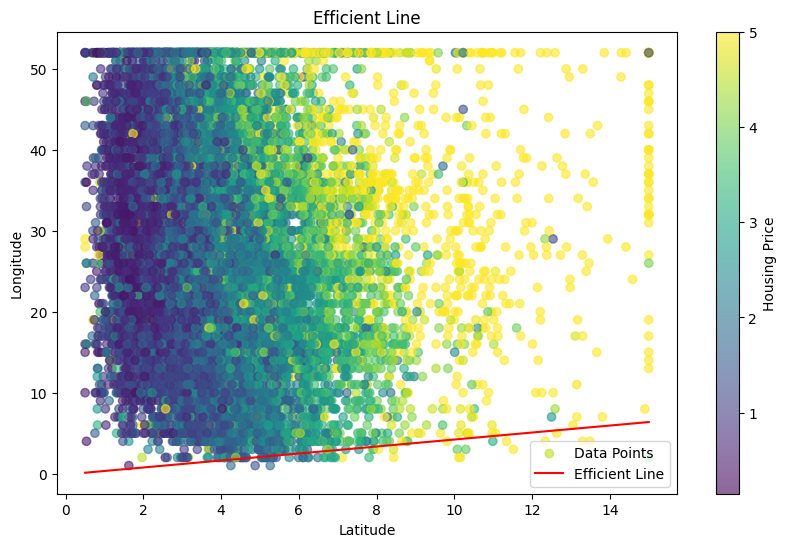

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(latitude_longitude[:, 0], latitude_longitude[:, 1], c=Y, cmap='viridis', alpha=0.6, label='Data Points')

# Plot the line for Objective 1: Efficient Line
x_values = np.linspace(min(latitude_longitude[:, 0]), max(latitude_longitude[:, 0]), 100)
y_values_efficient = slope_efficient * x_values + intercept_efficient
plt.plot(x_values, y_values_efficient, color='red', label='Efficient Line')

# Add legend and labels
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Efficient Line')

# Add colorbar
plt.colorbar(label='Housing Price')

# Add legend
plt.legend()

# Show plot
plt.show()

In [13]:
def find_fair_line_ransac(X, y):
    ransac = RANSACRegressor(LinearRegression(), residual_threshold=0.1)
    ransac.fit(X, y)

    slope = ransac.estimator_.coef_[0]
    intercept = ransac.estimator_.intercept_

    return slope, intercept

slope_fair, intercept_fair = find_fair_line_ransac(latitude_longitude, Y)

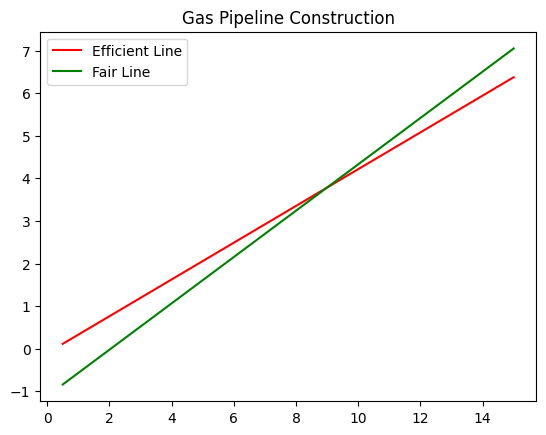

In [16]:

# Plot the efficient line
x_values = np.linspace(min(latitude_longitude[:, 0]), max(latitude_longitude[:, 0]), 100)  # Generate x values for plotting
y_values_efficient = slope_efficient * x_values + intercept_efficient  # Calculate y values using the efficient line equation
plt.plot(x_values, y_values_efficient, color='red', label='Efficient Line')  # Plot the efficient line

# Plot the fair line
x_values = np.linspace(min(latitude_longitude[:, 0]), max(latitude_longitude[:, 0]), 100)  # Generate x values for plotting
y_values_fair = slope_fair * x_values + intercept_fair  # Calculate y values using the fair line equation
plt.plot(x_values, y_values_fair, color='green', label='Fair Line')  # Plot the fair line

# Add title and legend to the plot
plt.title('Gas Pipeline Construction')  # Add title
plt.legend()  # Add legend
plt.show()  # Display the plot

# Comments:
# - For both the efficient line and the fair line, we generate x values using np.linspace() to cover the range of latitude values.
# - Then, we calculate the corresponding y values for each line using their respective slope and intercept parameters.
# - The efficient line is plotted in red color with the label 'Efficient Line'.
# - Similarly, the fair line is plotted in green color with the label 'Fair Line'.
# - The title 'Gas Pipeline Construction' is added to the plot.
# - A legend is included to differentiate between the efficient and fair lines.
# - Finally, the plot is displayed using plt.show().


Text(0, 0.5, 'Latitude')

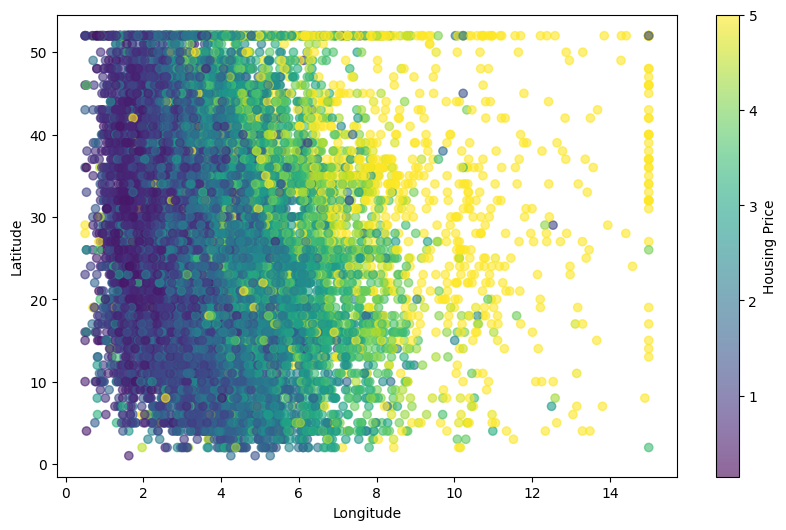

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(latitude_longitude[:, 0], latitude_longitude[:, 1], c=Y, cmap='viridis', alpha=0.6)
plt.colorbar(label='Housing Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


In [19]:
# Calculate total_distances
total_distances = []

# Iterate through each point and calculate its distance from the fair line
for point in latitude_longitude:
    distance = distance_point_to_line(point, slope_fair, intercept_fair)  # Assuming distance_point_to_line function is defined
    total_distances.append(distance)

# Calculate the maximum distance (fair_line_distance)
fair_line_distance = np.max(total_distances)

# Explanation:
# - First, we need to calculate the distances of each point from the fair line.
# - We can use a loop to iterate through each point in 'latitude_longitude' and calculate its distance from the fair line using the 'distance_point_to_line' function.
# - The distances can be stored in a list named 'total_distances'.
# - Finally, we can calculate the maximum distance from the fair line using 'np.max(total_distances)' and assign it to 'fair_line_distance'.


In [21]:
print("Objective 1: Efficient Line (slope, intercept):", slope_efficient, intercept_efficient)
print("Objective 2: Fair Line distance:", fair_line_distance)

Objective 1: Efficient Line (slope, intercept): 0.43169190754495385 -0.1018903275908265
Objective 2: Fair Line distance: 46.41529492910917


In [22]:
import matplotlib.pyplot as plt

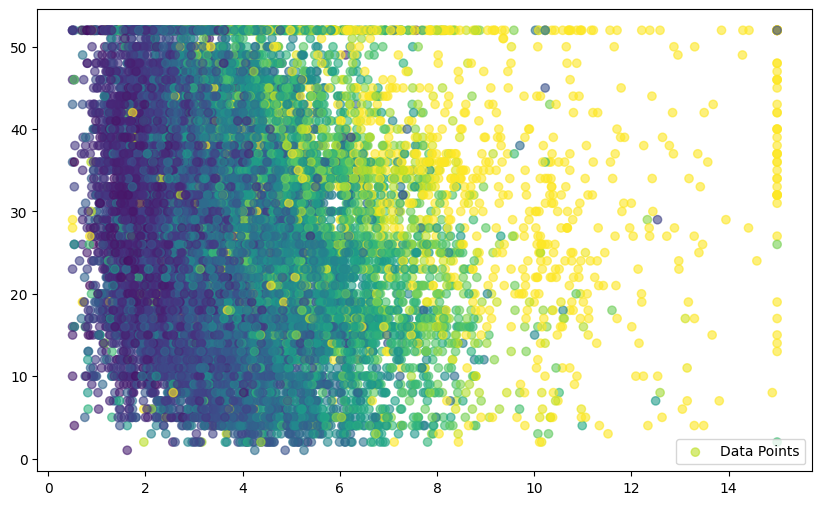

In [24]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (width=10 inches, height=6 inches)

plt.scatter(latitude_longitude[:, 0], latitude_longitude[:, 1],  # Scatter plot of latitude_longitude data
            c=Y,  # Color of each point determined by the target variable Y
            cmap='viridis',  # Colormap for mapping the target variable to colors
            alpha=0.6,  # Transparency level of the points (0.0 for fully transparent, 1.0 for fully opaque)
            label='Data Points')  # Label for the scatter plot

# Explanation:
# - The 'plt.figure(figsize=(10, 6))' statement creates a new figure with a specific size.
# - 'latitude_longitude[:, 0]' extracts the latitude values from the latitude_longitude array.
#   Similarly, 'latitude_longitude[:, 1]' extracts the longitude values.
# - 'plt.scatter()' creates a scatter plot with latitude values on the x-axis and longitude values on the y-axis.
# - The 'c=Y' parameter assigns colors to the points based on the target variable Y.
# - 'cmap='viridis'' specifies the colormap to be used for mapping numerical values to colors.
# - 'alpha=0.6' sets the transparency level of the points to 0.6, making them slightly transparent.
# - The 'label='Data Points'' parameter assigns a label to the scatter plot for the legend.

plt.legend()  # Display the legend
plt.show()  # Show the plot

# Explanation:
# - 'plt.legend()' displays the legend on the plot, which in this case will show the label assigned to the scatter plot.
# - 'plt.show()' displays the plot.


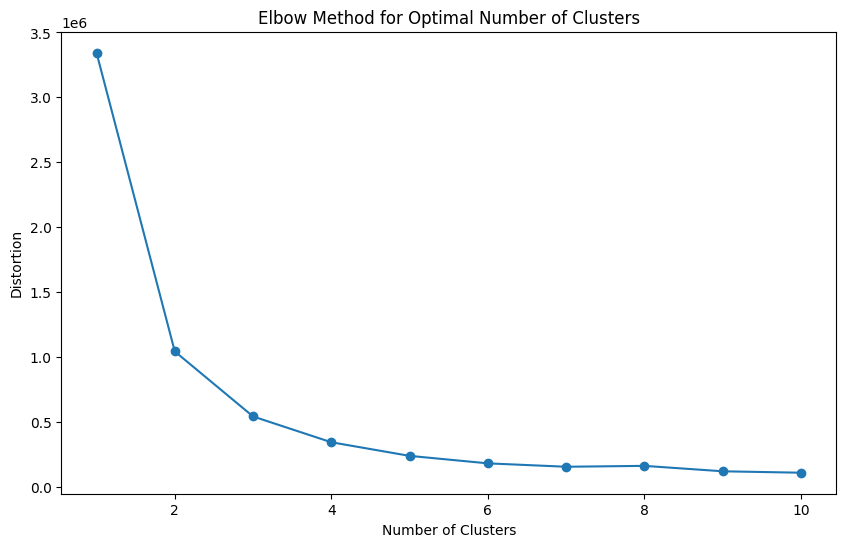

In [36]:
distortions = []  # Initialize a list to store distortions (within-cluster sum of squared distances) for each number of clusters
max_clusters = 10  # Maximum number of clusters to try

# Iterate through different numbers of clusters
for i in range(1, max_clusters + 1):
    # Create a KMeans model with 'i' clusters and fit it to the data
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(latitude_longitude)
    
    # Append the distortion (inertia) to the distortions list
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size
plt.plot(range(1, max_clusters + 1), distortions, marker='o')  # Plot number of clusters vs. distortions
plt.xlabel('Number of Clusters')  # Label for x-axis
plt.ylabel('Distortion')  # Label for y-axis
plt.title('Elbow Method for Optimal Number of Clusters')  # Title of the plot
plt.show()  # Show the plot


In [33]:
def find_multiple_efficient_lines(X, y, num_lines):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_lines, random_state=42)  # Initialize KMeans with the specified number of clusters
    cluster_labels = kmeans.fit_predict(X)  # Assign each data point to a cluster and get cluster labels

    lines = []  # Initialize a list to store the parameters (slope, intercept) of the lines

    # Fit a line to each cluster
    for label in range(num_lines):
        cluster_indices = np.where(cluster_labels == label)[0]  # Get indices of data points belonging to the current cluster
        cluster_X = X[cluster_indices]  # Extract features (X) for the current cluster
        cluster_y = y[cluster_indices]  # Extract target variable (y) for the current cluster

        model = LinearRegression()  # Initialize a linear regression model
        model.fit(cluster_X, cluster_y)  # Fit the model to the data points in the current cluster

        slope = model.coef_[0]  # Get the slope of the fitted line
        intercept = model.intercept_  # Get the intercept of the fitted line

        lines.append((slope, intercept))  # Append the parameters of the fitted line to the list of lines

    return lines  # Return the list of lines


In [30]:
num_lines = 4 # Number of efficient lines to find


In [37]:
lines = find_multiple_efficient_lines(latitude_longitude, Y, num_lines) # Find multiple efficient lines
print("Objective 3: Multiple Efficient Lines (slope, intercept):", lines)  # Print the parameters of the multiple efficient lines

Objective 3: Multiple Efficient Lines (slope, intercept): [(0.4759466260223244, -0.37511968930729056), (0.39399813313606913, 0.11646436887786349), (0.4218930944166171, -1.9236364653932494), (0.4281854895148527, 0.11263922096968448)]


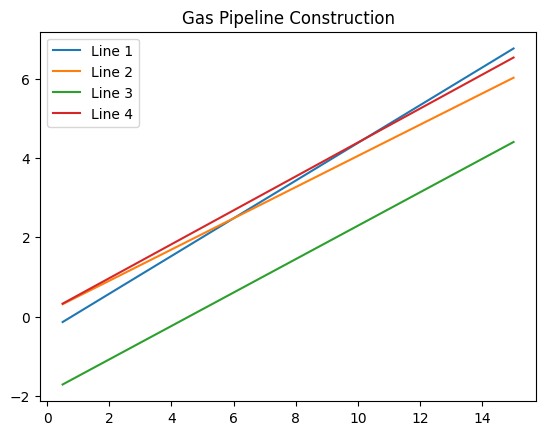

In [35]:

# Plot the multiple lines
for i, (slope, intercept) in enumerate(lines):
    x_values = np.linspace(min(latitude_longitude[:, 0]), max(latitude_longitude[:, 0]), 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, label=f'Line {i+1}')

plt.title('Gas Pipeline Construction')
plt.legend()
plt.show()